In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

from tqdm import tqdm # progress bars :)
tqdm.pandas()

In [2]:
k21_anicsv = "gtdb-rs202.family.nucleotide-k21-scaled1000.recalc-ani.csv"
k31_anicsv = "gtdb-rs202.nucleotide-k31-scaled1000.recalc-ani.csv"

In [13]:
k21 = pd.read_csv(k21_anicsv)
k21.head()

,comparison,query_name,match_name,lca_rank,lca_lineage,query_ani,match_ani,avg_ani,query_containment,match_containment,avg_containment
0,GCF_002950215_x_GCF_006461405,GCF_002950215,GCF_006461405,family,f__Enterobacteriaceae,0.853684,0.850339,0.852012,0.036078,0.033223,0.034650
1,GCF_002950215_x_GCF_003064405,GCF_002950215,GCF_003064405,family,f__Enterobacteriaceae,0.852225,0.848775,0.850500,0.034805,0.031963,0.033384
2,GCF_002950215_x_GCF_013372345,GCF_002950215,GCF_013372345,species,s__Escherichia flexneri,0.978667,0.977679,0.978173,0.635823,0.622481,0.629152
3,GCF_002950215_x_GCF_012052805,GCF_002950215,GCF_012052805,family,f__Enterobacteriaceae,0.854864,0.853916,0.854390,0.037139,0.036284,0.036712
4,GCF_002950215_x_GCF_001246885,GCF_002950215,GCF_001246885,family,f__Enterobacteriaceae,0.852717,0.852161,0.852439,0.035229,0.034750,0.034990


In [15]:
k21['alpha-ksize'] = "nucleotide-21"
k21.head()

,comparison,query_name,match_name,lca_rank,lca_lineage,query_ani,match_ani,avg_ani,query_containment,match_containment,avg_containment,alpha-ksize
0,GCF_002950215_x_GCF_006461405,GCF_002950215,GCF_006461405,family,f__Enterobacteriaceae,0.853684,0.850339,0.852012,0.036078,0.033223,0.034650,nucleotide-21
1,GCF_002950215_x_GCF_003064405,GCF_002950215,GCF_003064405,family,f__Enterobacteriaceae,0.852225,0.848775,0.850500,0.034805,0.031963,0.033384,nucleotide-21
2,GCF_002950215_x_GCF_013372345,GCF_002950215,GCF_013372345,species,s__Escherichia flexneri,0.978667,0.977679,0.978173,0.635823,0.622481,0.629152,nucleotide-21
3,GCF_002950215_x_GCF_012052805,GCF_002950215,GCF_012052805,family,f__Enterobacteriaceae,0.854864,0.853916,0.854390,0.037139,0.036284,0.036712,nucleotide-21
4,GCF_002950215_x_GCF_001246885,GCF_002950215,GCF_001246885,family,f__Enterobacteriaceae,0.852717,0.852161,0.852439,0.035229,0.034750,0.034990,nucleotide-21


In [23]:
prot_order = ["protein-7", "protein-8", "protein-9", "protein-10", "protein-11"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
alphak_order = nucl_order + prot_order
rankorder = ["species", "genus", "family", "order", "class", "phylum", "superkingdom"]

alphak_colors = {}
#nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
nucl_colors =  {"nucleotide-21":"#f4a582","nucleotide-31":"#d6604d","nucleotide-51":"#b2182b"}


# greens
#protein_colors = {"protein-7": "#a1d99b", "protein-8": "#299617", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
# blues
blues=sns.color_palette("Blues", 10)
blues_hex = blues.as_hex()[4:]
protein_colors = dict(zip(prot_order, blues_hex))
#protein_colors = dict(zip(prot_order, blues_hex[::-1]))
alphak_colors.update(nucl_colors)
alphak_colors.update(protein_colors)



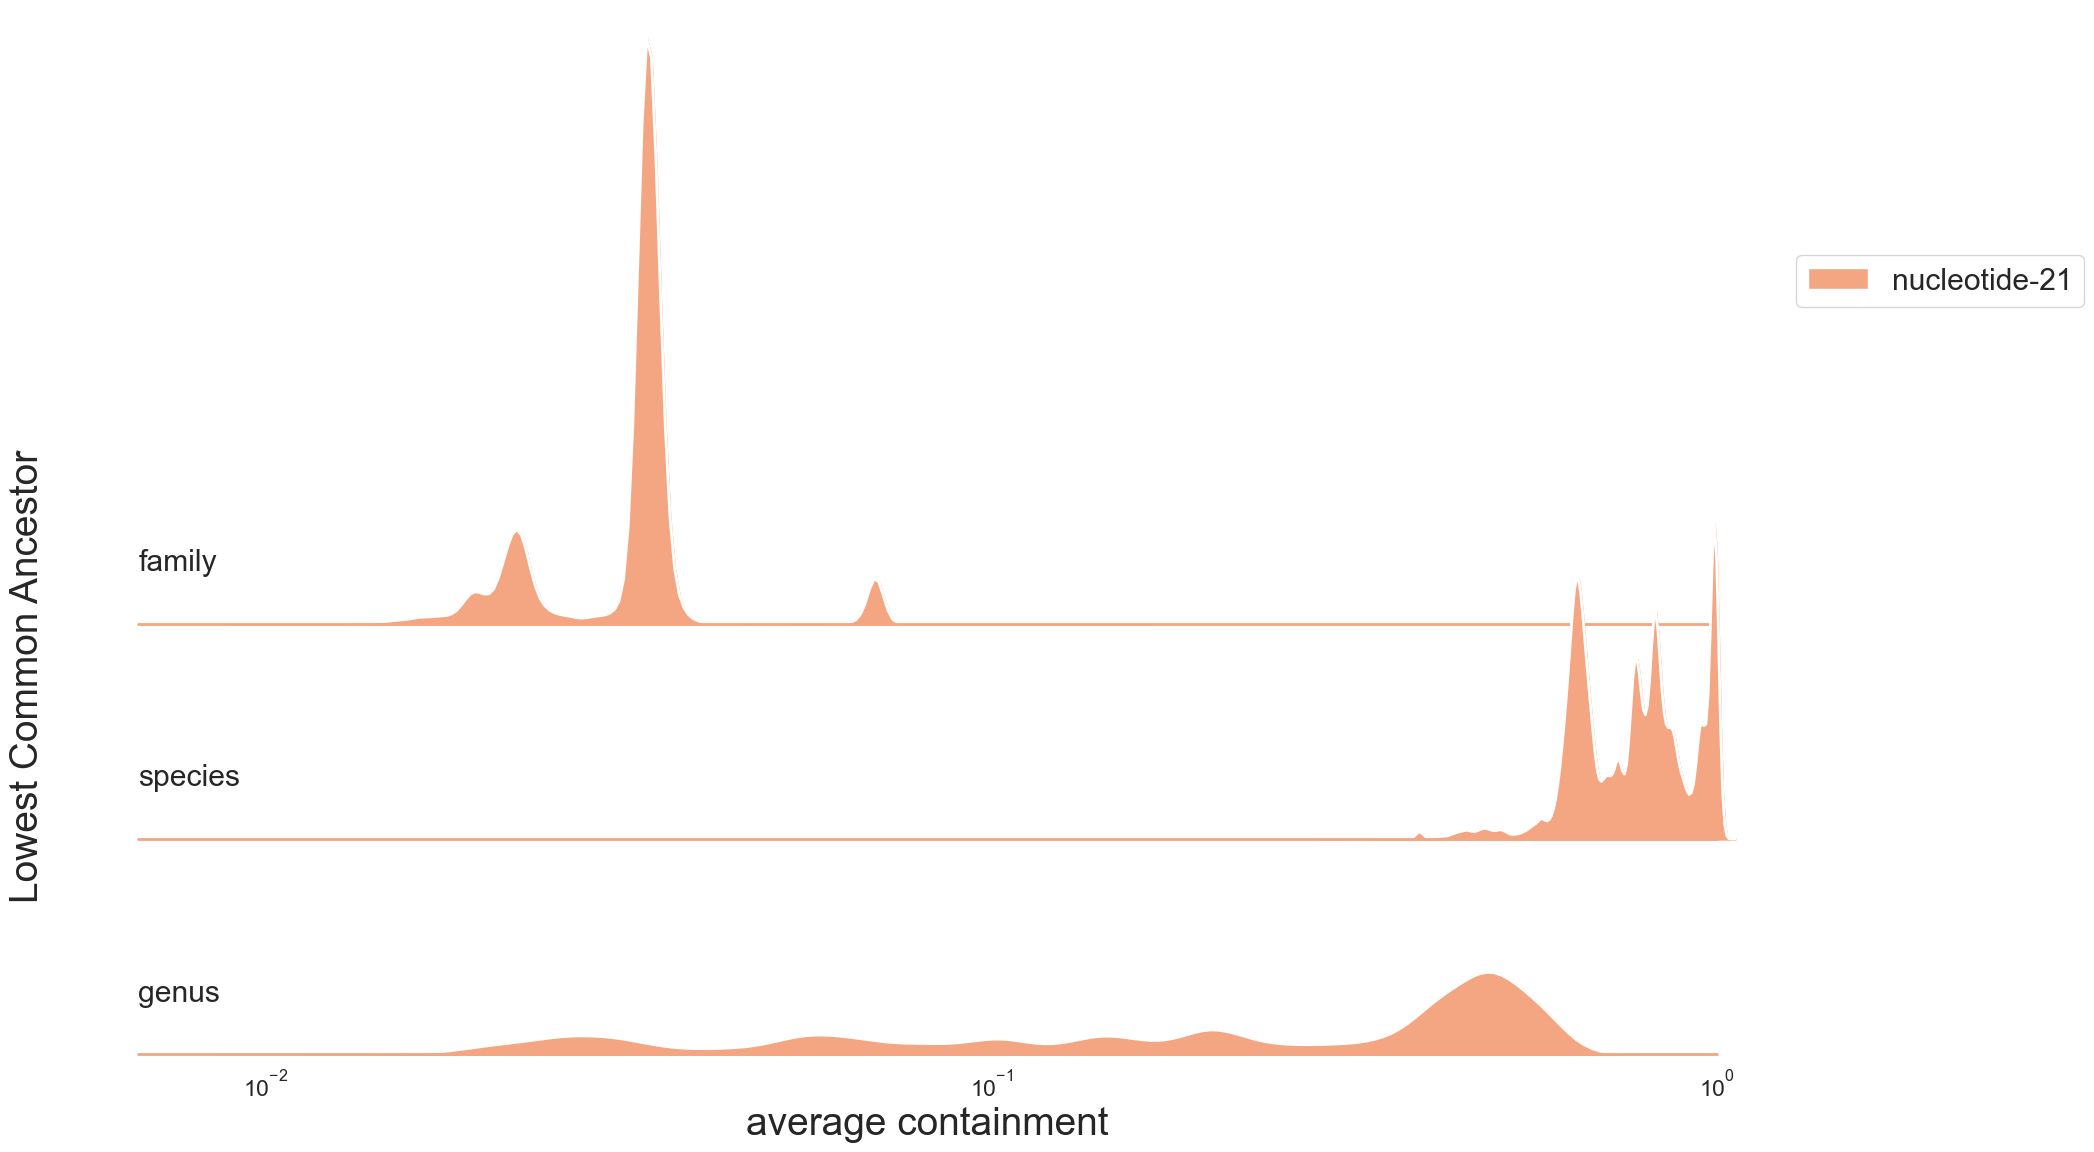

<Figure size 640x480 with 0 Axes>

In [29]:
# ridgeplot code from AAI
def label(x, color, label):
        ax = plt.gca()
        lb = x.unique()[0]#.upper()
       # print(lb)
        ax.text(0, .1, lb, size="large",# fontweight="bold",# color=color,
                ha="left", va="center", transform=ax.transAxes)

#sns.set_theme(style="white")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

#with sns.plotting_context("paper", font_scale=2,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, "axes.facecolor": (0, 0, 0, 0)}):
#THIS PLOTTING CONTEXT screws things up for some reason.
g = sns.FacetGrid(k21, row="lca_rank", hue="alpha-ksize", aspect=15, height=1.2, palette=alphak_colors)
g.set(xscale="log")

g.map(sns.kdeplot, "avg_containment", bw_adjust=.6, cut=5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "avg_containment", bw_adjust=.6, cut=5, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
plt.gcf().set_size_inches(17, 12) 

    
g.map(label, "lca_rank")
    # make overlapping
#plt.subplots_adjust(hspace=-.65)
g.fig.subplots_adjust(hspace=-.65)

    # remove axis details that don't work well with overlapping plots
g.set(yticks=[], xlabel="", ylabel="", xlim=(None, 1),ylim=(None, None), title="")# xlim=(None, 1), , fontsize =10)
g.despine(bottom=True, left=True)

# create a legend
handles=[]
for ak, color in alphak_colors.items():
    if ak in k21["alpha-ksize"].unique():
        handles.append(mpatches.Patch(facecolor=color, label=ak))
lgd = plt.legend(handles=handles, bbox_to_anchor=(1.05, 1.3), loc=2, borderaxespad=0., facecolor="white", fontsize="large")
    
txt= g.fig.text(-0.02, 0.4, 'Lowest Common Ancestor', va='center', rotation='vertical', size=28)

plt.xlabel("average containment", size=28)
    #plt.ylabel("Lowest Common Ancestor", size=28)
plt.show()
plt.tight_layout()
#g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.ridgeplot.pdf", bbox_extra_artists=(lgd,txt), bbox_inches='tight')
#g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.ridgeplot.png", bbox_extra_artists=(lgd,txt), bbox_inches='tight')

In [12]:

def label(x, color, label):
        ax = plt.gca()
        lb = x.unique()[0]#.upper()
       # print(lb)
        ax.text(0, .1, lb, size="large",# fontweight="bold",# color=color,
                ha="left", va="center", transform=ax.transAxes)
#sns.set_theme(style="white",)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

#with sns.plotting_context("paper", font_scale=2,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, "axes.facecolor": (0, 0, 0, 0)}):
g = sns.FacetGrid(k21, row="lowest_common_rank", hue="alpha-ksize", aspect=15, height=1.2, palette=protein_colors)

g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, fill=True, alpha=0.7, linewidth=1.5)
g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
plt.gcf().set_size_inches(15, 12) 

    
g.map(label, "lowest_common_rank")
# make overlapping
g.fig.subplots_adjust(hspace=-.65)
# remove axis details that don't work well with overlapping plots
g.set(yticks=[], xlabel="", ylabel="", xlim=(0.35, 1), ylim=(None, None), title="")#, fontsize =10)
g.despine(bottom=True, left=True)

# create a legend
handles=[]
for ak, color in protein_colors.items():
    if ak in prot_only["alpha-ksize"].unique():
        handles.append(mpatches.Patch(facecolor=color, label=ak))
lgd = plt.legend(handles=handles, bbox_to_anchor=(1.05, .85), loc=2, borderaxespad=0., facecolor="white", fontsize="large")
txt= g.fig.text(-0.02, 0.35, 'Lowest Common Ancestor', va='center', rotation='vertical', size=28)
plt.xlabel("average containment AAI", size=28)
    #plt.ylabel("Lowest Common Ancestor", size=28)
plt.show()
plt.tight_layout()
#g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainAAI.ridgeplot.pdf", bbox_extra_artists=(lgd,txt), bbox_inches='tight')
#g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainANI.ridgeplot.png", bbox_extra_artists=(lgd,txt), bbox_inches='tight')

KeyError: 'alpha-ksize'